In [5]:
url_clientes = "https://gist.githubusercontent.com/ahcamachod/d08898e1cc84c7271856e78d9558ca3d/raw/2f7e1fa53711efe6433a5c5ec79948f600591cb9/clientes_zoop.csv"
url_ventas = "https://gist.githubusercontent.com/ahcamachod/966d7162a3c3a2769b8770b35abf1bcc/raw/d79941b3fa46a450f3611589abd8663399c1277b/ventas_zoop.csv"

In [6]:
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

In [7]:
clientes = pd.read_csv(url_clientes)

In [8]:
clientes.head()

,ID_compra,ID_cliente,ciudad,estado,region,edad,sexo_biologico,cashback,nota
0,904,8972,Oaxaca de Juárez,Oaxaca,Sur,49,Masculino,No,9
1,4613,5120,Ciudad de México,Ciudad de México,Centro,49,Femenino,No,9
2,5579,1847,Ciudad de México,Ciudad de México,Centro,24,Femenino,No,8
3,2405,2846,Ciudad de México,Ciudad de México,Centro,38,Femenino,Sí,7
4,2485,2715,Chihuahua,Chihuahua,Noroeste,30,Femenino,No,10


In [9]:
ventas = pd.read_csv(url_ventas)

In [10]:
ventas.tail()

,ID_compra,fecha,horario,categoria,precio_unitario,cantidad,envio,metodo_pago
6164,6141,2023-12-31,17:49,Electrodomésticos,1509.9,5,377.48,Tarjeta de Crédito
6165,6148,2023-12-31,23:02,Papelería y oficina,14.0,2,3.36,Transferencia
6166,6123,2023-12-31,21:25,Alimentos y bebidas,77.9,1,7.79,Tarjeta de Crédito
6167,6147,2023-12-31,21:38,Libros,142.9,4,17.15,Tarjeta de Crédito
6168,6122,2023-12-31,22:11,Belleza e higiene,89.9,5,13.48,Tarjeta de Crédito


In [11]:
# 4. Convertir la columna de fecha a tipo datetime y analizar
ventas['fecha'] = pd.to_datetime(ventas['fecha'], format='%Y-%m-%d')

In [12]:
# Supongamos que ya tenemos los DataFrames 'clientes' y 'ventas' cargados

# 1. Unir los DataFrames 'clientes' y 'ventas' utilizando 'ID_compra' como llave
df = pd.merge(ventas, clientes, on='ID_compra', how='inner')

# 2. Organizar las columnas en el orden deseado
df = df[['ID_compra', 'fecha', 'horario', 'categoria', 'precio_unitario', 'cantidad', 'envio',
          'metodo_pago', 'ID_cliente', 'edad', 'sexo_biologico', 'ciudad', 'estado',
          'region', 'cashback', 'nota']]

# 3. Mostrar las primeras filas del DataFrame unificado
df.head()

,ID_compra,fecha,horario,categoria,precio_unitario,cantidad,envio,metodo_pago,ID_cliente,edad,sexo_biologico,ciudad,estado,region,cashback,nota
0,6,2023-01-03,20:40,Electrónicos,4457.9,4,713.26,Paypal,6149,30,Masculino,Hermosillo,Sonora,Noroeste,Sí,10
1,5,2023-01-03,21:48,Herramientas y construcción,115.9,1,0.00,Transferencia,9491,36,Masculino,Ciudad de México,Ciudad de México,Centro,Sí,8
2,9,2023-01-03,17:08,Belleza e higiene,68.9,2,13.78,Tarjeta de Crédito,5288,39,Femenino,Aguascalientes,Aguascalientes,Centro-Norte,No,7
3,4,2023-01-03,14:29,Herramientas y construcción,80.9,5,40.45,Transferencia,9679,35,Masculino,Veracruz,Veracruz,Golfo,Sí,9
4,8,2023-01-03,18:02,Belleza e higiene,165.0,4,0.00,Transferencia,1380,50,Masculino,Ciudad de México,Ciudad de México,Centro,No,9


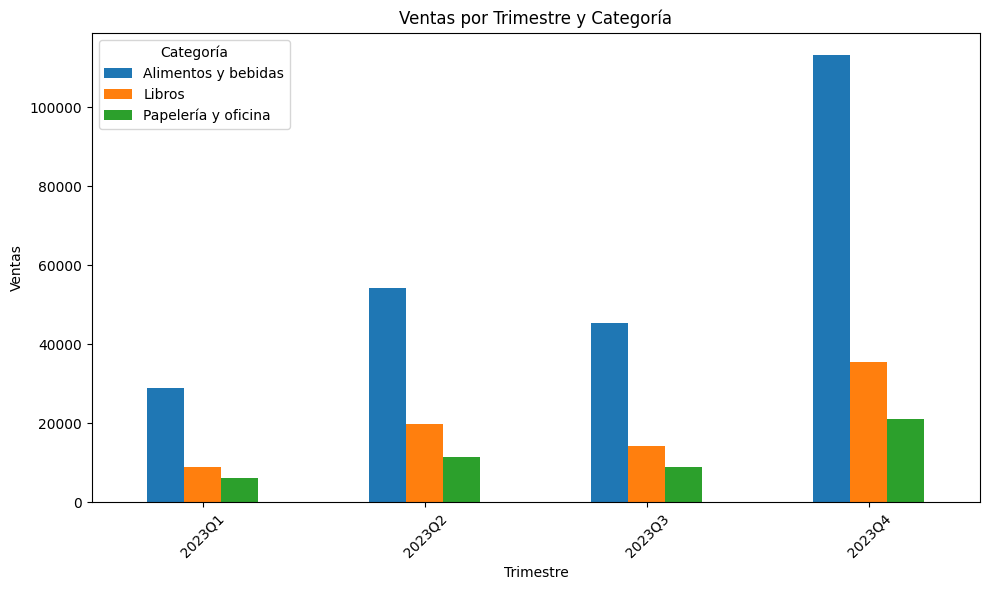

In [13]:
import matplotlib.pyplot as plt

df['facturacion'] = (df['precio_unitario'] * df['cantidad']) + df['envio']
df['trimestre'] = df['fecha'].dt.to_period('Q')
# Suponiendo que ya tienes el DataFrame df
# Filtrar las categorías deseadas
categorias_deseadas = ["Papelería y oficina", "Libros", "Alimentos y bebidas"]
df_filtrado = df[df['categoria'].isin(categorias_deseadas)]
# Pivotar los datos para tener los trimestres como índice y las categorías como columnas
pivot_df = df_filtrado.pivot_table(index='trimestre', columns='categoria', values='facturacion', aggfunc='sum')
# Crear el gráfico de columnas agrupadas
pivot_df.plot(kind='bar', stacked=False, figsize=(10, 6))
# Agregar etiquetas y título
plt.xlabel('Trimestre')
plt.ylabel('Ventas')
plt.title('Ventas por Trimestre y Categoría')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejorar la legibilidad
# Mostrar el gráfico
plt.legend(title='Categoría')
plt.tight_layout()
plt.show()

<font color="7b71ff" size=4> Comentarios: </font>

---
Este es un grafico de columnas agrupadas

In [14]:
df.head()

,ID_compra,fecha,horario,categoria,precio_unitario,cantidad,envio,metodo_pago,ID_cliente,edad,sexo_biologico,ciudad,estado,region,cashback,nota,facturacion,trimestre
0,6,2023-01-03,20:40,Electrónicos,4457.9,4,713.26,Paypal,6149,30,Masculino,Hermosillo,Sonora,Noroeste,Sí,10,18544.86,2023Q1
1,5,2023-01-03,21:48,Herramientas y construcción,115.9,1,0.00,Transferencia,9491,36,Masculino,Ciudad de México,Ciudad de México,Centro,Sí,8,115.90,2023Q1
2,9,2023-01-03,17:08,Belleza e higiene,68.9,2,13.78,Tarjeta de Crédito,5288,39,Femenino,Aguascalientes,Aguascalientes,Centro-Norte,No,7,151.58,2023Q1
3,4,2023-01-03,14:29,Herramientas y construcción,80.9,5,40.45,Transferencia,9679,35,Masculino,Veracruz,Veracruz,Golfo,Sí,9,444.95,2023Q1
4,8,2023-01-03,18:02,Belleza e higiene,165.0,4,0.00,Transferencia,1380,50,Masculino,Ciudad de México,Ciudad de México,Centro,No,9,660.00,2023Q1
